In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading data set
data1=pd.read_csv('Add_sales_data_2018.csv')

In [3]:
data1.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,10/08/2018,208.00,222.25,206.85,216.00,215.15,4093.065
1,10/05/2018,217.00,218.60,205.90,210.25,209.20,4042.448
2,10/04/2018,223.50,227.80,216.15,217.25,218.20,4213.819
3,10/03/2018,230.00,237.50,225.75,226.45,227.60,4391.665
4,10/01/2018,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
#Checking observations and features
data1.shape

(205, 7)

Checking null values and Dtypes

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [6]:
data1.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [7]:
#To find brief ideas about dataset
data1.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


# 1. Check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

In [8]:
#For company 1

min_spend_1=min(data1['Add1(in Thousands)'])
min_profit_1=data1.loc[data1['Add1(in Thousands)'] == min_spend_1]['Profit(in Thousands)'].values
print("The Minimum spending for Adv Company 1 is :",min_spend_1)
print("The profit corresponding to above spending is  :", min_profit_1)

max_spend_1=max(data1['Add1(in Thousands)'])
max_profit_1=data1.loc[data1['Add1(in Thousands)'] == max_spend_1]['Profit(in Thousands)'].values
print("The Maximum spending for Adv Company 1 is :",max_spend_1)
print("The profit corresponding to above spending is  :", max_profit_1)

The Minimum spending for Adv Company 1 is : 208.0
The profit corresponding to above spending is  : [4093.065]
The Maximum spending for Adv Company 1 is : 327.7
The profit corresponding to above spending is  : [6137.8]


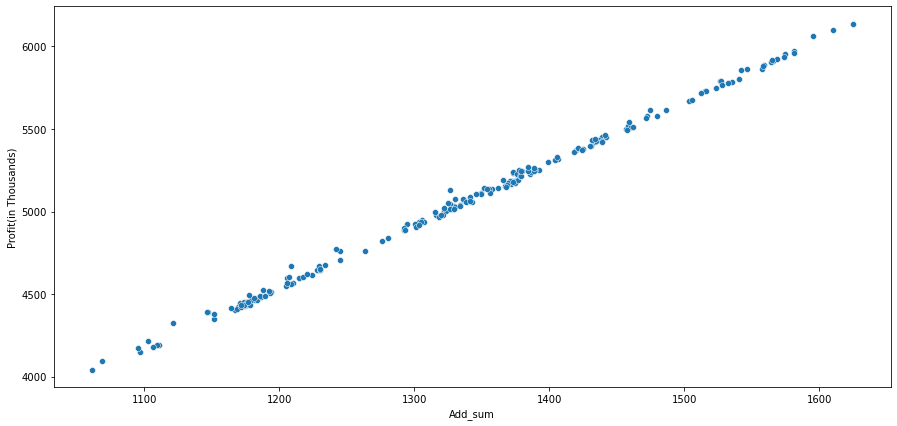

In [9]:
#Adding all spendings in a date and ploting graph
data1["Add_sum"] = data1["Add1(in Thousands)"] + data1["Add2(in Thousands)"] + data1["Add3(in Thousands)"] + data1["Add4(in Thousands)"] + data1["Add5(in Thousands)"]
plt.figure(figsize = (15,7))
sns.scatterplot(x='Add_sum', y='Profit(in Thousands)', data=data1)
plt.show()

We can see a positive linear relation between 'Spending for advertisement' and 'profit' for the textile company.ie, as spending on Adds increases profit also increases

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [10]:
data1.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)', 'Add_sum'],
      dtype='object')

In [11]:
#Add_sum not playing much role so droping from data set
data2=data1.drop(['Add_sum'], axis=1)

In [12]:
data2.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

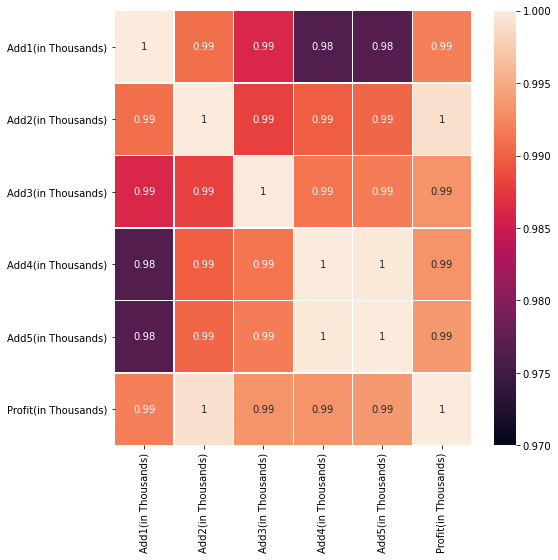

In [13]:
plt.figure(figsize = (8,8))
corrmatrix = data2.corr()
sns.heatmap(corrmatrix, vmin = .97, vmax = 1, annot = True, linewidth = 0.2)
plt.show()

There is a strong positive correlation between 'Add 4' and 'Add 5' companies, but removing 'Add 4' or 'Add 5' will affect the testing since the dataset has only 205 observations

In [14]:
y = data2['Profit(in Thousands)']
X = data2.drop(['Date','Profit(in Thousands)'],axis=1) # Removing 'Date' since it's an 'object' Dtype

In [15]:
X.shape #There is only 5 features now

(205, 5)

In [16]:
#importing libraries form scikit-learn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size=0.25) 

In [18]:
# Creating a Linear Regression variable
lin_reg = linear_model.LinearRegression()

In [19]:
#fiting training data to Linear Regression model
model = lin_reg.fit(X_train,y_train)

In [20]:
#Predicting Y (profit)
y_predi = model.predict(X_test)

In [21]:
#Actual y_values ie, 'profit' taken for testing
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64


In [22]:
print(y_predi)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457]


In [23]:
#showing MSE of 'Actual profit' and 'Predicted profit'
print('MSE is : ',mean_squared_error(y_predi,y_test))

MSE is :  1.1930489604130207e-24


MSE is 1.19 X e^(-24) ie, a small value. so, error is minimal

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
-Add1(in Thousands)290
-Add2(in Thousands)312
-Add3(in Thousands)309
-Add4(in Thousands)298
-Add5(in Thousands)320

In [24]:
x1 = {'Add1(in Thousands)' : 290, 'Add2(in Thousands)' : 312, 'Add3(in Thousands)' : 309, 'Add4(in Thousands)' : 298,'Add5(in Thousands)' : 320}

In [25]:
x1=pd.DataFrame(x1, index=[0])
prof_predict=model.predict(x1)

In [26]:
prof_predict

array([5820.06])

The 'predicted profit' is 5820.06 for corresponding spendings on 'Aadvertisement'